In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from IPython.display import clear_output


In [4]:
def show_img(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [70]:
def resize_img(img, scale_percent):

    width = int(img.shape[1] * scale_percent / 100) # 縮放後圖片寬度
    height = int(img.shape[0] * scale_percent / 100) # 縮放後圖片高度
    dim = (width, height) # 圖片形狀 
    resize_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)  
    
    return resize_img

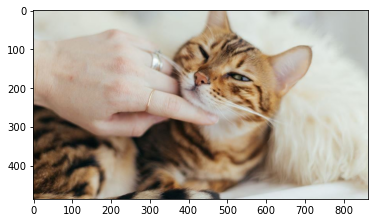

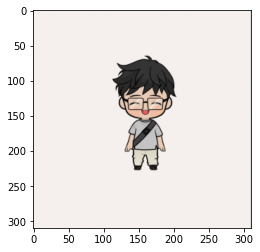

310 310
floodFill:


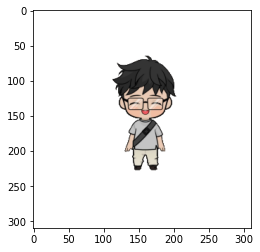

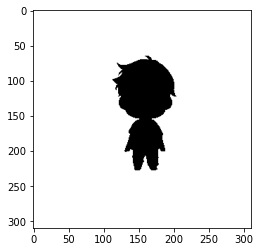

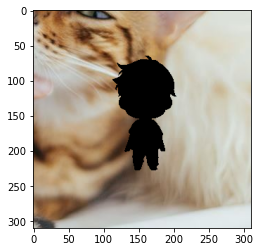

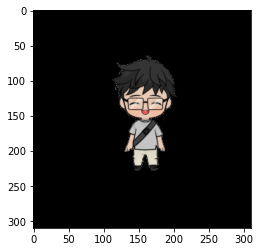

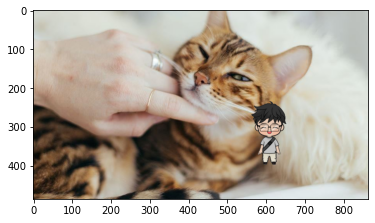

In [124]:
# Load two images
file_name = "./testdata/cat.jpg"
img1 = cv2.imread(file_name)
show_img(img1)

file_name = "./testdata/me.jpg"
img2 = cv2.imread(file_name)
img2 = resize_img(img2, scale_percent = 25) # 要放大縮小幾%
show_img(img2)

copyIma = img2.copy()
h, w = img2.shape[:2]
print(h, w)
mask = np.zeros([h+2, w+2], np.uint8)
cv2.floodFill(copyIma, mask, (30, 30), (255, 255, 255), (100, 100, 100), (50, 50, 50), cv2.FLOODFILL_FIXED_RANGE)  

print("floodFill:")
show_img(copyIma)

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(copyIma,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 254, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

show_img(mask)

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
x = 450 
y = 170
roi = img1[y:y+rows, x:x+cols]

# Now create a mask of logo and create its inverse mask also
# img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
# mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask = mask)
show_img(img1_bg)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask = mask_inv)
show_img(img2_fg)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[y:y+rows, x:x+cols] = dst

show_img(img1)


In [ ]:
def fill_color_demo(img):
    
    img = resize_img(img, scale_percent = 25) # 要放大縮小幾%
    copyIma = img.copy()
    h, w = img.shape[:2]
    print(h, w)
    mask = np.zeros([h+2, w+2], np.uint8)
    cv2.floodFill(copyIma, mask, (30, 30), (255, 255, 255), (100, 100, 100), (50, 50, 50), cv2.FLOODFILL_FIXED_RANGE)  
    
    print("floodFill:")
    show_img(copyIma)
    
    
    # Now create a mask of logo and create its inverse mask also
    img2gray = cv2.cvtColor(copyIma,cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 254, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    
    show_img(mask)
    
    
    
    file_name = "./testdata/cat.jpg"
    cat_img = cv2.imread(file_name)
    show_img(cat_img)
    
    rows, cols = mask.shape
    roi = cat_img[0:rows, 0:cols]
    
    # Now black-out the area of logo in ROI
    img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
    show_img(img1_bg)
    
    
    # Take only region of logo from logo image.
    img2_fg = cv2.bitwise_and(img, img, mask = mask)
    show_img(img2_fg)
    
    # Put logo in ROI and modify the main image
    dst = cv.add(img1_bg,img2_fg)
    img1[0:rows, 0:cols ] = dst
    
    show_img(img2_fg)
    
    
    

In [ ]:
def img_processing(img):
    
    fill_color_demo(img)


    
    h, w = img.shape[:2]                        #获取图像的高和宽  

#     blured = cv2.blur(img,(5,5))                #进行滤波去掉噪声

    mask = np.zeros((h+2, w+2), np.uint8)       #掩码长和宽都比输入图像多两个像素点，满水填充不会超出掩码的非零边缘  
    #进行泛洪填充
    floodfill_img = cv2.floodFill(img, mask, (0,0), (0,0,0), (2,2,2),(3,3,3),8)
    
    
    show_img(img)
# 16 
# 17 #得到灰度图
# 18 gray = cv2.cvtColor(blured,cv2.COLOR_BGR2GRAY)  
# 19 cv2.imshow("gray", gray)  
# 20 
# 21 
# 22 #定义结构元素  
# 23 kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(50, 50))
# 24 #开闭运算，先开运算去除背景噪声，再继续闭运算填充目标内的孔洞
# 25 opened = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)  
# 26 closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)  
# 27 cv2.imshow("closed", closed)  
# 28 
# 29 #求二值图
# 30 ret, binary = cv2.threshold(closed,250,255,cv2.THRESH_BINARY)  
# 31 cv2.imshow("binary", binary)  
# 32 
# 33 #找到轮廓
# 34 _,contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
# 35 #绘制轮廓
# 36 
# 37 cv2.drawContours(img,contours,-1,(0,0,255),3)  
# 38 #绘制结果
# 39 cv2.imshow("result", img)
# 40 
# 41 cv2.waitKey(0)  
# 42 cv2.destroyAllWindows()  

#     return img

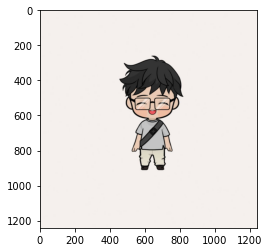

310 310
floodFill:


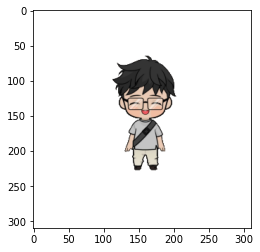

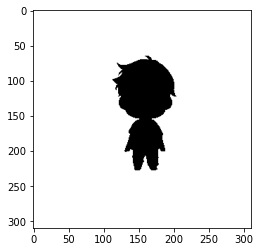

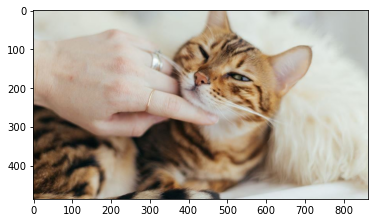

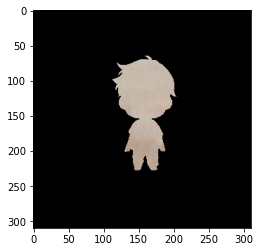

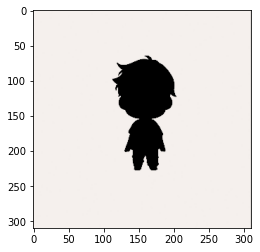

NameError: name 'cv' is not defined

In [99]:
file_name = "./testdata/me.jpg"
origin_img = cv2.imread(file_name)
show_img(origin_img)

result_img = img_processing(origin_img)
show_img(result_img)

# Reference

https://www.cnblogs.com/youmuchen/p/7450049.html

https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html

https://www.hotbak.net/key/%E5%9B%BE%E7%89%87%E5%85%8B%E9%9A%86cv2seamlessClone%E6%95%88%E6%9E%9C%E5%AF%B9%E6%AF%94%E6%8C%89%E4%BD%8D%E8%BF%90%E7%AE%97bitwCSDN%E5%8D%9A%E5%AE%A2.html

https://blog.csdn.net/haofan_/article/details/76687238

https://blog.csdn.net/u014365862/article/details/78863756?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-4.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-4.channel_param

